In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [2]:
df = pd.read_csv("F:/Downloadd/us.csv")
df['date']=pd.to_datetime(df['date'], errors='coerce')
nulls=df['date'][df['date'].notnull()==False]


In [3]:
len(df['date'])

6448

# SENTIMENT ANALYSIS

In [4]:
sid = SentimentIntensityAnalyzer()

In [5]:
#nltk.download('vader_lexicon')

In [6]:
sid = SentimentIntensityAnalyzer()

In [7]:
df.dropna(subset = ['Review'],inplace=True)

In [8]:
df['Review'].replace(['\n' , '\n\n\n' ,'\n\n\n\n','\n\n\n' ,],'', regex=True , inplace = True)

In [9]:
df['polarity_score']= df.Review.apply(lambda Review:sid.polarity_scores(Review)['compound'])
#df['pp'] = df.Review.apply(lambda Review:sid.polarity_scores(Review))


In [10]:
df['Location'].fillna("LNG",inplace=True)

In [11]:
new=df

In [12]:
def feeed(x):
    if x>0.0:
        return "Positive"
    if x<0.0:
        return "Negative"
    if x==0.0:
        return "Neutral"
    

In [13]:
new["Feedback"] = new["polarity_score"].apply(lambda x:feeed(x))

In [14]:
new2=new.groupby("Feedback")

In [15]:
new2["Location"].value_counts().sort_values(ascending=False)

Feedback  Location                 
Positive  LNG                          3264
Negative  LNG                           933
Neutral   LNG                           491
Positive  United States of America       64
Negative  United States of America       27
                                       ... 
Positive  Long Beach                      1
          Long Island , NY                1
          Long Island NY                  1
          Longwood                        1
          Carleton Place, ON Canada       1
Name: Location, Length: 1199, dtype: int64

# 1. Maximum no. of customers who visited or were satisfied/dissatisfied with the hotels/restaurants were from USA (north america) .

# 2. Rooms were booked mostly by the American people.

In [16]:
pfilter = (new["Feedback"] == "Positive")
nfilter = (new["Feedback"] == "Negative")
ntfilter = (new["Feedback"] == "Neutral")


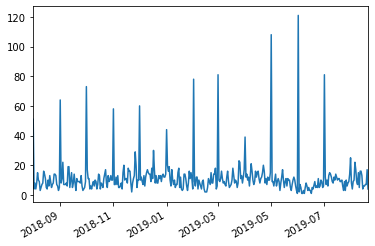

In [17]:
new.loc[pfilter ,['date']].date.value_counts().plot()

# 3. Rooms were maximum booked in jun-2019

(array([802.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 3.2730e+02, 6.5360e+02, 9.7990e+02, 1.3062e+03,
        1.6325e+03, 1.9588e+03, 2.2851e+03, 2.6114e+03, 2.9377e+03,
        3.2640e+03]),
 <a list of 10 Patch objects>)

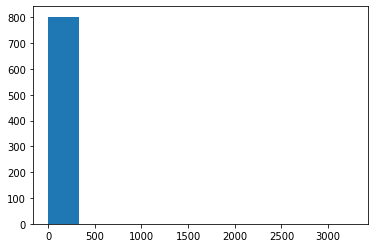

In [28]:
new.loc[pfilter ,['Location']].Location.value_counts()

In [19]:
new.loc[nfilter ,['date']].date.value_counts()

2019-06-01    23
2019-05-01    22
2019-07-01    18
2018-09-01    17
2019-03-01    16
              ..
2019-04-20     1
2019-08-06     1
2019-01-31     1
2018-09-29     1
2019-04-24     1
Name: date, Length: 347, dtype: int64

In [20]:
new.Location.value_counts()

LNG                         4688
United States of America     116
New York                      34
San Jose                      19
California                    19
                            ... 
Horseheads,NY, us              1
quebradillas                   1
Dallas                         1
Livermore, Ca                  1
Castleford                     1
Name: Location, Length: 1079, dtype: int64

# 4. A large no. of customers who used the Rooms didn't mention their location.

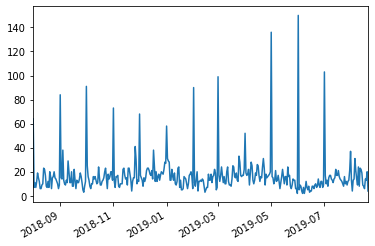

In [21]:
new.date.value_counts().sort_values(ascending=False).plot()

# 5. Maximum Rooms were almost booked/used on the first day of every month.

In [22]:
new.to_csv("cutshort.csv")
